<a href="https://colab.research.google.com/github/gkambasta/ML-Projects/blob/main/GK_M5_NB_MiniProject_1_ResumeClassification_Using_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project 1: Resume Classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Resume dataset
* perform multinomial Naive Bayes classification on the Resume dataset

### Dataset description

The data is in CSV format, with two features: Category, and Resume.

**Category** -  Industry sector to which the resume belongs to, and

**Resume** - The complete CV (text) of the candidate.

##  Grading = 10 Points

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decision making.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Downloading the data

In [103]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/UpdatedResumeDataSet.csv
print("Data Downloaded Successfuly!!")
!ls | grep '.csv'

Data Downloaded Successfuly!!
UpdatedResumeDataSet.csv
UpdatedResumeDataSet.csv.1


**Exercise 1: Read the UpdatedResumeDataset.csv dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [104]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [105]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [106]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset [0.5 Mark]**



In [107]:
# Display the distinct categories of resume
# YOUR CODE HERE
print(df['Category'].unique())


['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [108]:
# Display the distinct categories of resume and the number of records belonging to each category
# YOUR CODE HERE
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

**Exercise 3: Create the count plot of different categories [0.5 Mark]**

**Hint:** Use `sns.countplot()`

<Axes: xlabel='count', ylabel='Category'>

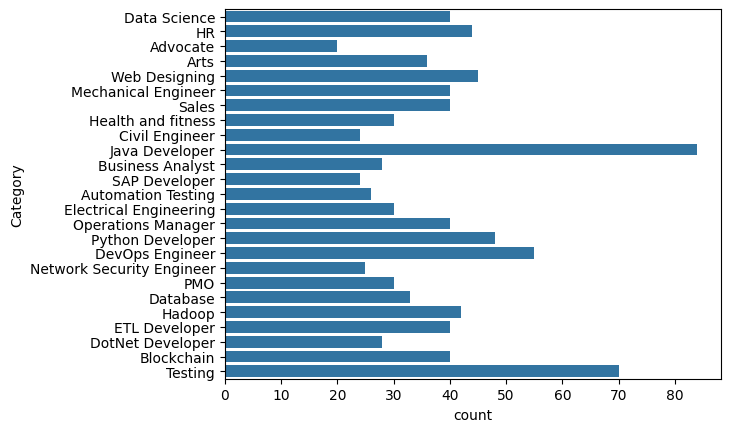

In [109]:
from tkinter.constants import FALSE
# YOUR CODE HERE
sns.countplot(df['Category'])

**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

([<matplotlib.patches.Wedge at 0x7c08c308c3d0>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169057, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1

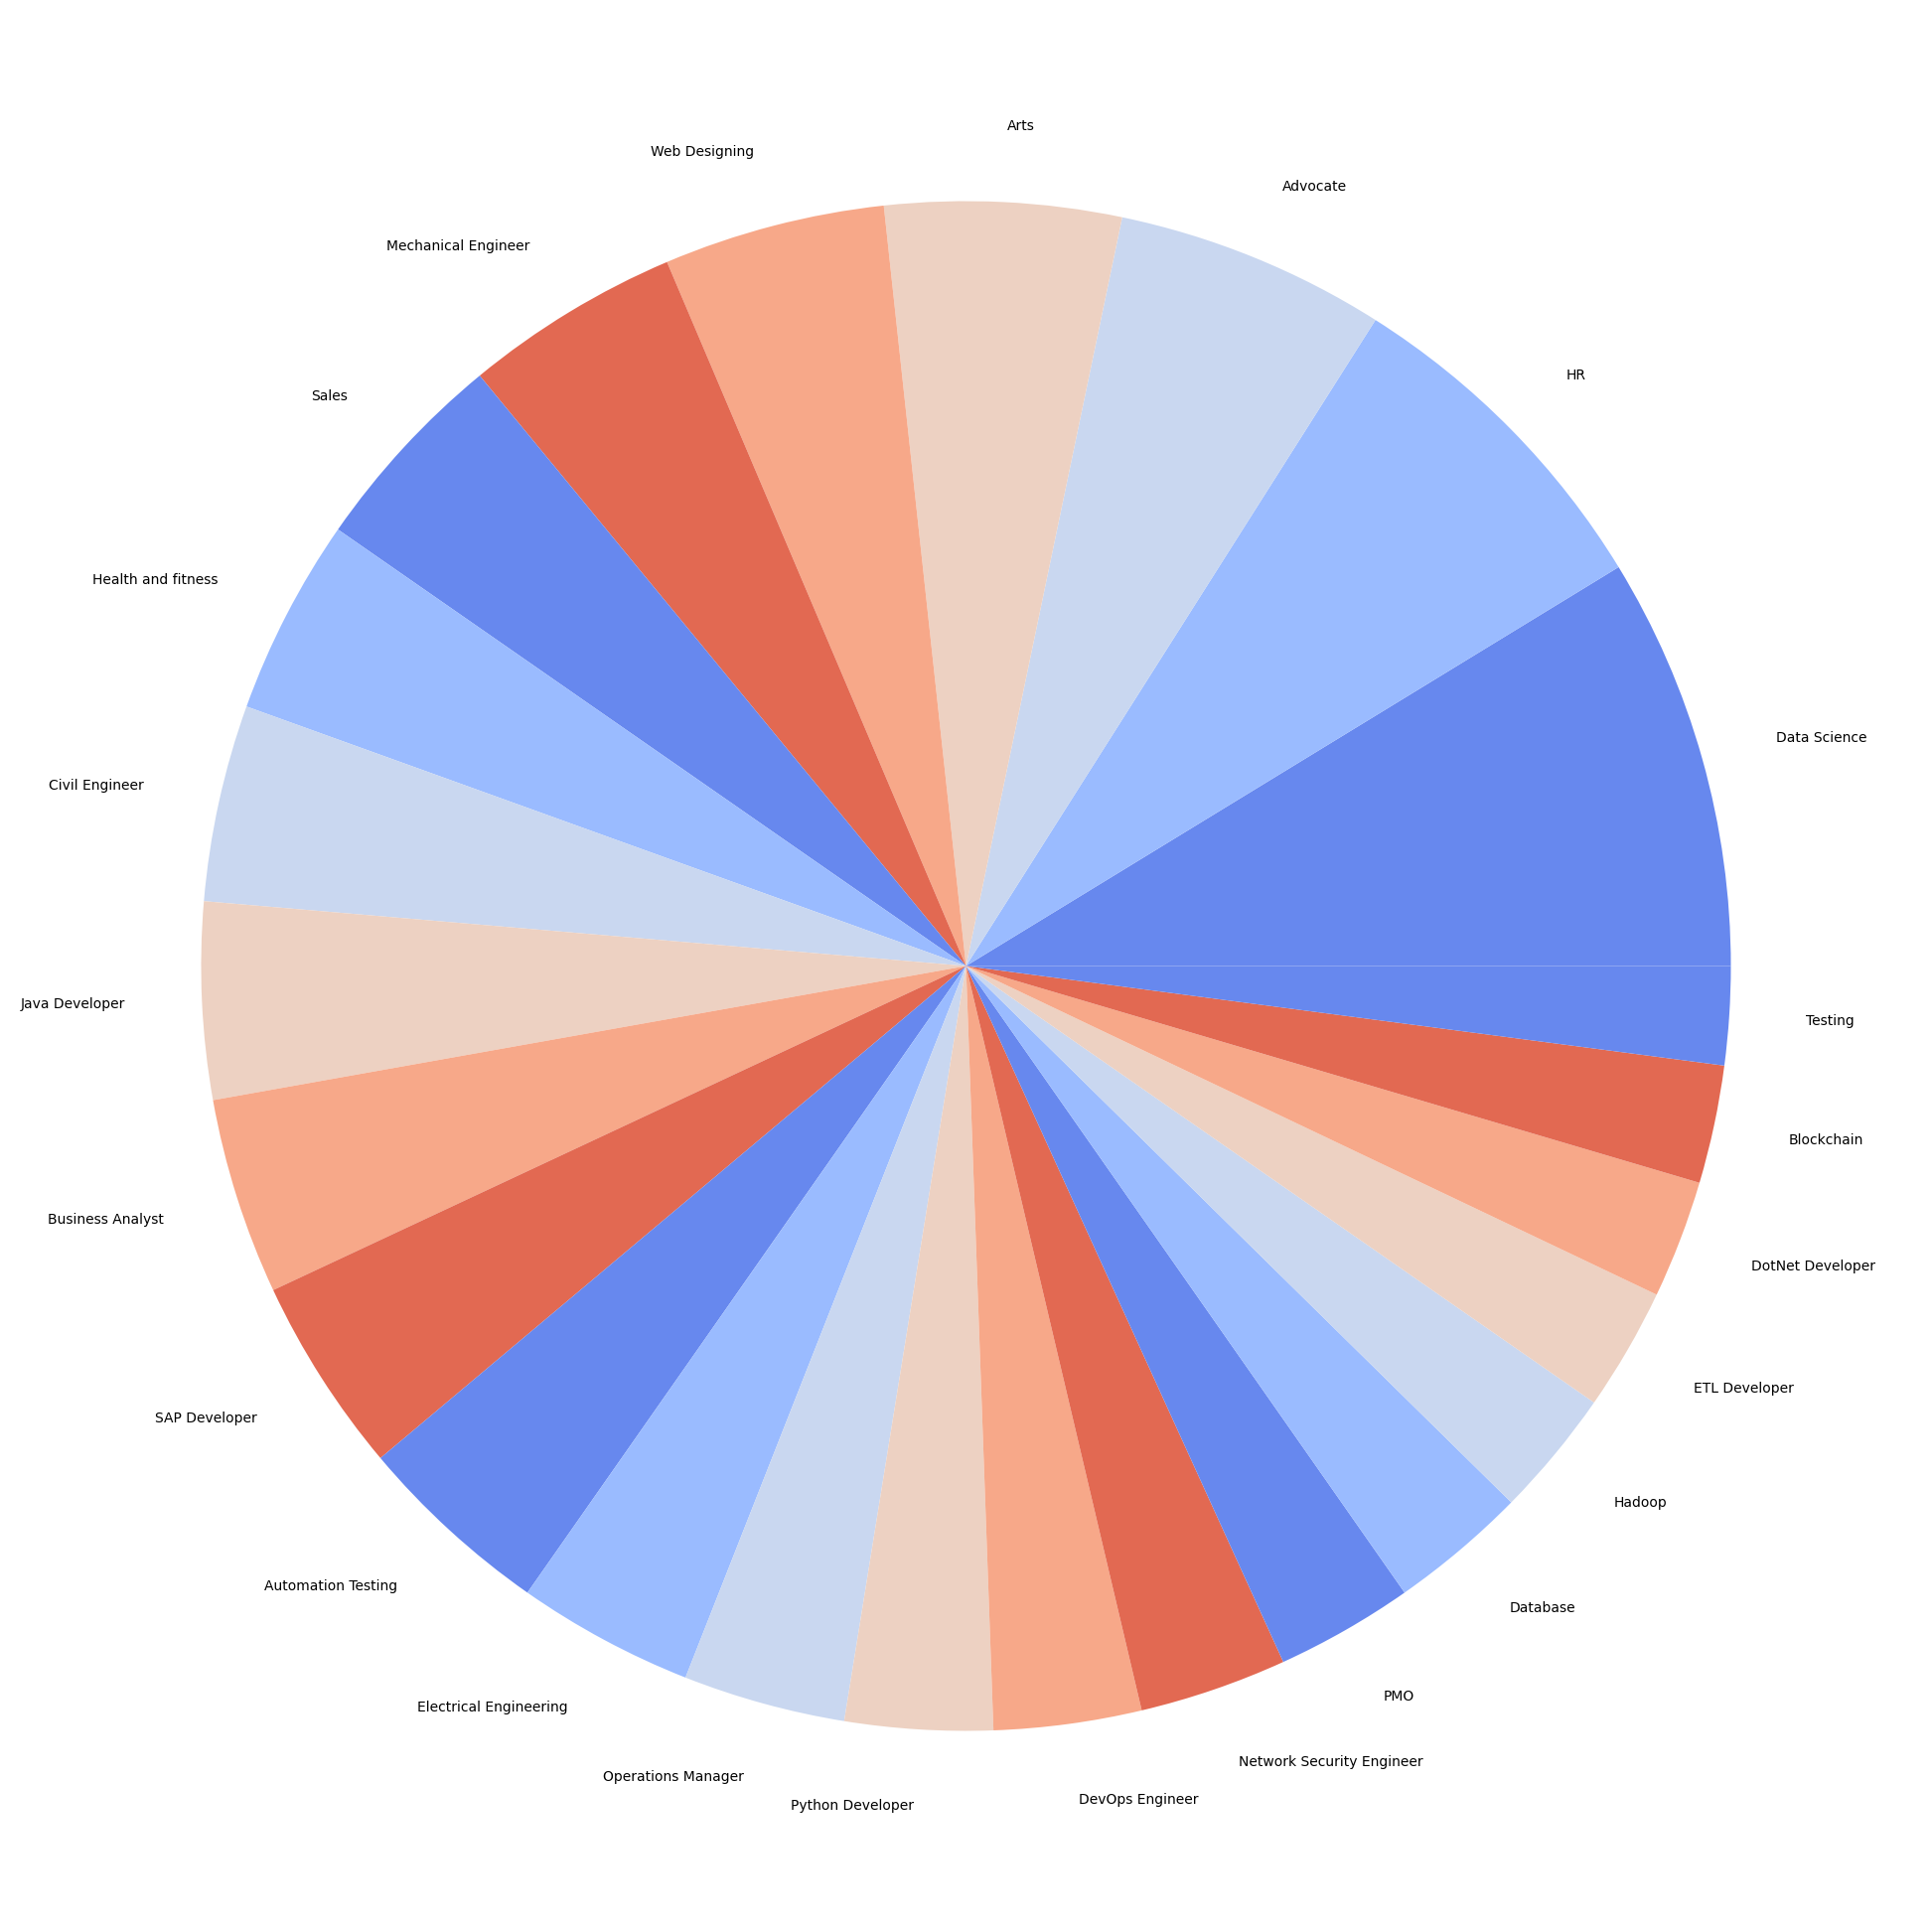

In [110]:
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.pie(targetCounts, labels = targetLabels,colors=sns.color_palette('coolwarm'))

# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)

**Exercise 5: Convert all the `Resume` text to lower case [0.5 Mark]**




In [111]:
# Convert all characters to lowercase
# YOUR CODE HERE
df['Resume'] = df['Resume'].apply(lambda x:x.lower())

In [112]:
df.head()

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."


### Cleaning resumes' text data

**Exercise 6: Define a function to clean the resume text [2 Mark]**

In the text there are special characters, urls, hashtags, mentions, etc. Remove the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature).


In [113]:
import re
x = 'rame#sh@go are er#iam'
text = re.sub(r'[@/s,#]', '',x)
print(text)

ramehgo are eriam


In [114]:
import re
def cleanResume(resumeText):
    # YOUR CODE HERE
    #
    #
    text = re.sub('http\S+\s*', '', resumeText)  # remove URLs
    text = re.sub('RT|cc', '', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '', text)  # remove mentions
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)

    return text


In [115]:
 # apply the function defined above and save the
 # YOUR CODE HERE
 df['cleaned_resume'] = df['Resume'].apply(cleanResume)

In [116]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas nu...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details \r\n mca ymcaust faridaba...


In [117]:
sent_lens = []
for i in df.cleaned_resume:
    length = len(i.split())
    sent_lens.append(length)

print(len(sent_lens))
print(max(sent_lens))

962
2014


### Stopwords removal

The stopwords, for example, `and, the, was, and so forth` etc. appear very frequently in the text and are not helpful in the predictive process. Therefore these are usually removed for text analytics and text classification purposes.

1. Tokenize the input words into individual tokens and store it in an array
2. Using `nltk.corpus.stopwords`, remove the stopwords

Hint: See Module 1 - Assignment 4 'Text Classification using Naive Bayes'


**Exercise 7: Use `nltk` package to find the most common words from the `cleaned resume` column [2 Marks]**

**Hint:**
* Use `nltk.FreqDist`


In [118]:
# stopwords
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)
# YOUR CODE HERE to print the stopwords in english language

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [119]:
# most common words
# YOUR CODE HERE
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize


def remove_stopwords(text, is_lower_case=False):
    # splitting strings into tokens (list of words)
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        # filtering out the stop words
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


df['cleaned_resume'] = df['cleaned_resume'].apply(remove_stopwords)
df.head()

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 uitrgpv da...
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...


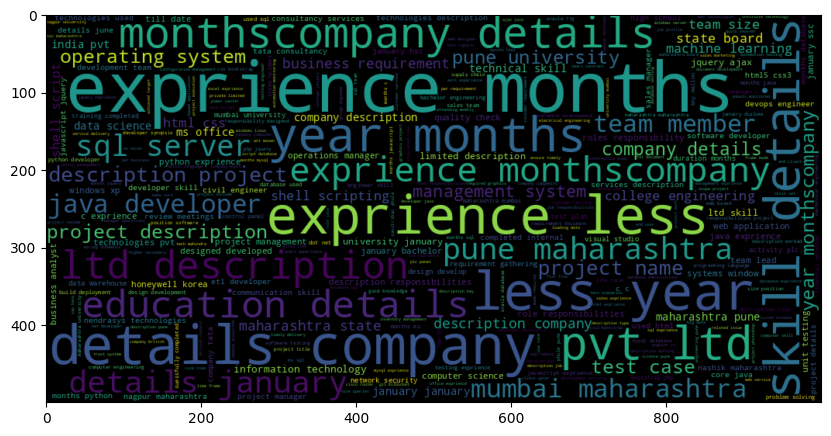

In [120]:
# YOUR CODE HERE to show the most common word using WordCloud
plt.figure(figsize=(10,10))

text = ' '.join(resume for resume in df.cleaned_resume)
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
words = WC.generate(text)
plt.imshow(words, interpolation='bilinear')
plt.show()

**Exercise 8: Convert the categorical variable `Category` to a numerical feature and make a different column, which can be treated as the target variable [0.5 Mark]**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['Category'])

# YOUR CODE HERE
df

,Category,Resume,cleaned_resume,label
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 uitrgpv da...,6
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6
...,...,...,...,...
957,Testing,computer skills: â¢ proficient in ms office (...,computer skills proficient ms office word basi...,23
958,Testing,â willingness to accept the challenges. â ...,willingness aept challenges positive thinking ...,23
959,Testing,"personal skills â¢ quick learner, â¢ eagerne...",personal skills quick learner eagerness learn ...,23
960,Testing,computer skills & software knowledge ms-power ...,computer skills software knowledge mspower poi...,23


### Feature Extraction

**Exercise 9: Convert the text to feature vectors by applying `tfidf vectorizer` to the Label encoded category made above [2 Marks]**

`TF-IDF`will tokenize documents, learn the vocabulary, inverse document frequency weightings, and allow you to encode new documents

**Hint:** Use [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).



In [122]:
X = df['cleaned_resume']
y = df['label']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [124]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(769,)
(193,)
(769,)
(193,)


In [125]:
# YOUR CODE HERE
# tfidf vectorizer
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range = (1,3))
#transformed train reviews
tfidf_train = tv.fit_transform(X_train)
#transformed test reviews
tfidf_test = tv.transform(X_test)
print('Tfidf_train:', tfidf_train.shape)
print('Tfidf_test:', tfidf_test.shape)

Tfidf_train: (769, 5526)
Tfidf_test: (193, 5526)


## Naive Bayes Classifier

**Exercise 10: Split the data into train and test sets. Apply Naive Bayes Classifier (MultinomialNB) and evaluate the model predictions [1 mark]**

**Hint:** Use Vectorized features made above as X and Labelled category as y.

In [126]:
# YOUR CODE HERE
# training the model
mnb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# fitting the NaiveBayes for tfidf features
mnb_tfidf = mnb.fit(tfidf_train, y_train)


In [127]:
mnb_tfidf_predict = mnb.predict(tfidf_test)

In [128]:
mnb_tfidf_score = accuracy_score(y_test, mnb_tfidf_predict)
print("mnb_tfidf_score :", mnb_tfidf_score)

mnb_tfidf_score : 0.09844559585492228


## Optional: Create a Gradio based web interface to test and display the model predictions

In [129]:
!pip -q install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.0 MB/s eta 0:00:00


In [130]:
import gradio

In [131]:
# YOUR CODE HERE

**Report Analysis**
- Which method(s), other than TF-IDF could be used for text to vector conversion?
- Discuss about the `alpha`, `class_prior` and `fit_prior` parameters in sklearn `MultinomialNB`


Dataset Source Reference: [Resume dataset](https://www.kaggle.com/gauravduttakiit/resume-dataset/download)